In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import xgboost

In [ ]:
train_data = pd.read_excel("Final Dataset.xlsx")

In [ ]:
train_data.shape

(22469, 6)

In [ ]:
train_data.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,10,2019,80,0
1,PROD_3,SLSMAN_1,11,2019,80,0
2,PROD_3,SLSMAN_1,12,2019,40,0
3,PROD_5,SLSMAN_1,10,2019,160,211
4,PROD_5,SLSMAN_1,11,2019,160,173


In [ ]:
train_data.isna().sum()

PROD_CD         0
SLSMAN_CD       0
PLAN_MONTH      0
PLAN_YEAR       0
TARGET_IN_EA    0
ACH_IN_EA       0
dtype: int64

from this above observation we say that there is no any null values in our dataset

In [ ]:
train_data.dtypes

PROD_CD         object
SLSMAN_CD       object
PLAN_MONTH       int64
PLAN_YEAR        int64
TARGET_IN_EA     int64
ACH_IN_EA        int64
dtype: object

So here PROD_CD and SLSMAN_CD are two object type variables

In [ ]:
train_data.describe()

,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
count,22469.000000,22469.0,22469.000000,22469.000000
mean,11.039744,2019.0,3790.074058,3714.193244
std,0.800889,0.0,10792.649817,10608.964868
min,10.000000,2019.0,0.000000,0.000000
25%,10.000000,2019.0,12.000000,70.000000
50%,11.000000,2019.0,252.000000,323.000000
75%,12.000000,2019.0,2208.000000,2124.000000
max,12.000000,2019.0,302400.000000,295578.000000


# Exploratory Data Analysis

In [ ]:
## get product code in number from its value
## like 5 from prod_5

product_code = list(train_data["PROD_CD"].unique())
code_in_num = []
for i in range(len(product_code)):
    num_code = product_code[i].split(sep = "_")[1:]
    code_in_num.append(num_code)


In [ ]:
## code_num is a nested list type
## convert into a single list we use Iterable method
## to do so we create a flattern method

from collections import Iterable

def flattern(lis):
    for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for i in flattern(item):
                yield i
        else:
            yield item


C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  """


In [ ]:
## perform flattern method to convert nested list into a sinle list on code_num
code_in_num = list(flattern(code_in_num))

## all elements in code_num are string type to convert into int we int(i) in line comprehension
PROD_CD = [int(i) for i in code_in_num]

In [ ]:
## whatever we did with prod_cd same we will perform on slsman_cd

product_code = list(train_data["SLSMAN_CD"].unique())
code_in_num = []
for i in range(len(product_code)):
    num_code = product_code[i].split(sep = "_")[1:]
    code_in_num.append(num_code)

code_in_num  = list(flattern(code_in_num))
SLSMAN_CD = [int(i) for i in code_in_num]

In [ ]:
## for maping we required a dictionary. So we create res dictionary type variable to perfrom maping on dataset
## here we perfrom maping on prod_cd

res = {}

res = {train_data["PROD_CD"].unique()[i]: PROD_CD[i] for i in range(len(PROD_CD))}

train_data["PROD_CD"] = train_data["PROD_CD"].map(res)

In [ ]:
## for maping we required a dictionary. So we create res, dictionary type variable to perfrom maping on dataset
## here we perfrom maping on slsman_cd

res = {train_data["SLSMAN_CD"].unique()[i]: SLSMAN_CD[i] for i in range(len(SLSMAN_CD))}
train_data["SLSMAN_CD"] = train_data["SLSMAN_CD"].map(res)

In [ ]:
train_data.head(10)

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,3,1,10,2019,80,0
1,3,1,11,2019,80,0
2,3,1,12,2019,40,0
3,5,1,10,2019,160,211
4,5,1,11,2019,160,173
5,5,1,12,2019,240,175
6,8,1,10,2019,0,7
7,10,1,10,2019,0,82
8,10,1,11,2019,0,79
9,10,1,12,2019,0,59


In [ ]:
train_data.drop(["ACH_IN_EA"], axis=1, inplace=True)

In [ ]:
train_data.describe()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA
count,22469.000000,22469.000000,22469.000000,22469.0,22469.000000
mean,38.117006,107.721216,11.039744,2019.0,3790.074058
std,22.604243,63.753173,0.800889,0.0,10792.649817
min,1.000000,1.000000,10.000000,2019.0,0.000000
25%,19.000000,50.000000,10.000000,2019.0,12.000000
50%,36.000000,107.000000,11.000000,2019.0,252.000000
75%,56.000000,163.000000,12.000000,2019.0,2208.000000
max,86.000000,225.000000,12.000000,2019.0,302400.000000


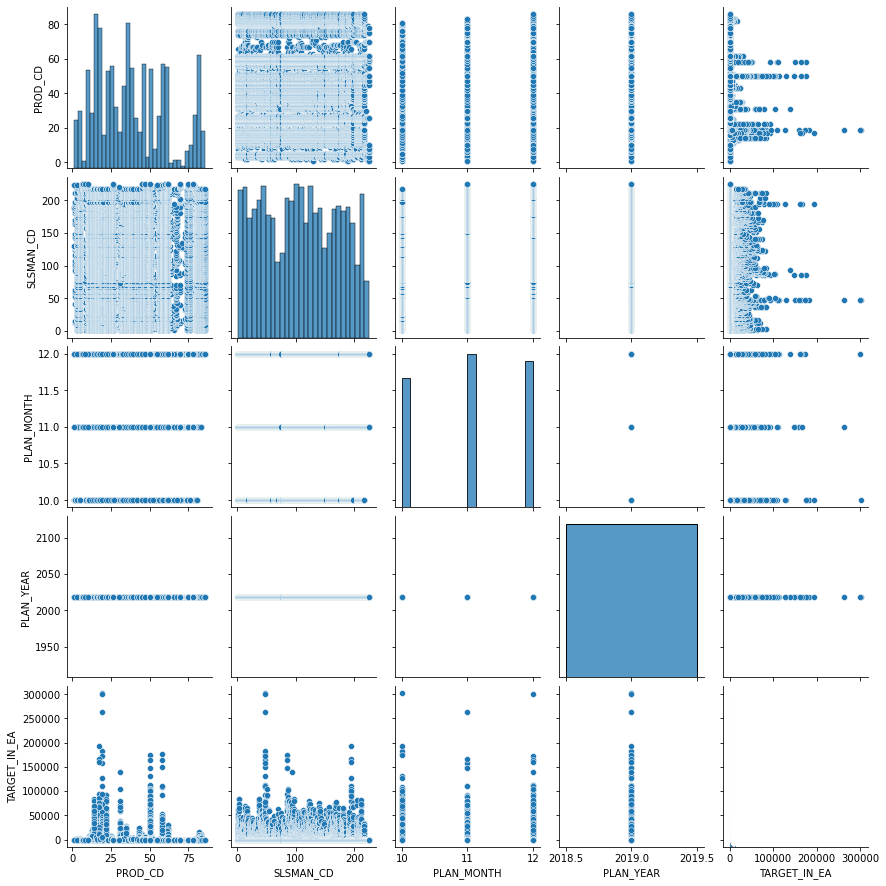

In [ ]:
sbn.pairplot(train_data)

In [ ]:
## here we find co-relation between all the features

train_data.corr()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA
PROD_CD,1.000000,0.002740,0.064444,NaN,-0.048965
SLSMAN_CD,0.002740,1.000000,0.011546,NaN,-0.022989
PLAN_MONTH,0.064444,0.011546,1.000000,NaN,-0.028070
PLAN_YEAR,NaN,NaN,NaN,NaN,NaN
TARGET_IN_EA,-0.048965,-0.022989,-0.028070,NaN,1.000000


<AxesSubplot:>

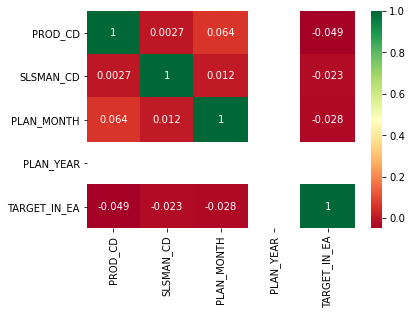

In [ ]:
## co-relation in graphical form

sbn.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")

Here only TARGET_IN_EA and ACH_IN_EA are highly co-related meand they have equal significance

In [ ]:
X=train_data.drop(["TARGET_IN_EA"],axis=1)
y=train_data["TARGET_IN_EA"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train = X_train.values
X_test = X_test.values

# XGBOOST

In [ ]:
xg_reg = xgboost.XGBRegressor(objective='reg:squarederror')

In [ ]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
xg_reg.score(X_train, y_train)

0.49123154400700286

In [ ]:
xg_reg.score(X_test, y_test)

0.4610151824038965

# Hyperparameter Tuning of XG_Boost

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Learning Rate
learning_rate = [0.5, 0.1, 0.15, 0.20, 0.25, 0.30]

# Number of trees in xgboost
n_estimators = [10, 50, 100, 200, 300]

# max number of levels in tree
max_depth = [3, 4, 5, 6, 8, 10, 12, 15]

In [ ]:
param_grid = {
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'n_estimators': n_estimators
}

In [ ]:
grid = GridSearchCV(xgboost.XGBRegressor(objective='reg:squarederror'), param_grid, verbose=3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.429, total=   0.2s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.471, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.477, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.308, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.427, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.546, total=   0.5s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.574, total=   0.6s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.581, total=   0.6s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.437, total=   0.6s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.553, total=   0.6s


[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.730, total=   0.8s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.613, total=   0.8s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.751, total=   0.8s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.726, total=   1.5s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.766, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.765, total=   1.5s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.662, total=   1

[CV]  learning_rate=0.5, max_depth=8, n_estimators=100, score=0.870, total=   2.1s
[CV] learning_rate=0.5, max_depth=8, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=8, n_estimators=100, score=0.838, total=   2.1s
[CV] learning_rate=0.5, max_depth=8, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=8, n_estimators=100, score=0.798, total=   2.1s
[CV] learning_rate=0.5, max_depth=8, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=8, n_estimators=100, score=0.854, total=   2.1s
[CV] learning_rate=0.5, max_depth=8, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=8, n_estimators=200, score=0.800, total=   4.2s
[CV] learning_rate=0.5, max_depth=8, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=8, n_estimators=200, score=0.879, total=   4.2s
[CV] learning_rate=0.5, max_depth=8, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=8, n_estimators=200, score=0.847, total= 

[CV]  learning_rate=0.5, max_depth=12, n_estimators=200, score=0.702, total=   6.3s
[CV] learning_rate=0.5, max_depth=12, n_estimators=200 ...............
[CV]  learning_rate=0.5, max_depth=12, n_estimators=200, score=0.861, total=   6.2s
[CV] learning_rate=0.5, max_depth=12, n_estimators=200 ...............
[CV]  learning_rate=0.5, max_depth=12, n_estimators=200, score=0.825, total=   6.2s
[CV] learning_rate=0.5, max_depth=12, n_estimators=200 ...............
[CV]  learning_rate=0.5, max_depth=12, n_estimators=200, score=0.731, total=   6.3s
[CV] learning_rate=0.5, max_depth=12, n_estimators=200 ...............
[CV]  learning_rate=0.5, max_depth=12, n_estimators=200, score=0.849, total=   6.3s
[CV] learning_rate=0.5, max_depth=12, n_estimators=300 ...............
[CV]  learning_rate=0.5, max_depth=12, n_estimators=300, score=0.702, total=   9.4s
[CV] learning_rate=0.5, max_depth=12, n_estimators=300 ...............
[CV]  learning_rate=0.5, max_depth=12, n_estimators=300, score=0.861, 

[CV]  learning_rate=0.1, max_depth=3, n_estimators=200, score=0.539, total=   2.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300, score=0.553, total=   3.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300, score=0.583, total=   3.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300, score=0.576, total=   3.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300, score=0.436, total=   3.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300, score=0.563, total=   3.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10 .................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=10, score=0.321, total=  

[CV]  learning_rate=0.1, max_depth=5, n_estimators=300, score=0.641, total=   4.5s
[CV] learning_rate=0.1, max_depth=5, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=300, score=0.769, total=   4.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=10, score=0.389, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=10, score=0.412, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=10, score=0.418, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=10, score=0.276, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=10, score=0.385, total=   0.2

[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, score=0.554, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=10 ................
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, score=0.382, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=10 ................
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, score=0.576, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.677, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.780, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.751, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.636, total= 

[CV]  learning_rate=0.1, max_depth=15, n_estimators=50, score=0.771, total=   2.3s
[CV] learning_rate=0.1, max_depth=15, n_estimators=50 ................
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50, score=0.779, total=   2.3s
[CV] learning_rate=0.1, max_depth=15, n_estimators=50 ................
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50, score=0.711, total=   2.4s
[CV] learning_rate=0.1, max_depth=15, n_estimators=50 ................
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50, score=0.755, total=   2.3s
[CV] learning_rate=0.1, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=15, n_estimators=100, score=0.670, total=   4.4s
[CV] learning_rate=0.1, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=15, n_estimators=100, score=0.793, total=   4.4s
[CV] learning_rate=0.1, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=15, n_estimators=100, score=0.786, tota

[CV]  learning_rate=0.15, max_depth=4, n_estimators=100, score=0.587, total=   0.5s
[CV] learning_rate=0.15, max_depth=4, n_estimators=100 ...............
[CV]  learning_rate=0.15, max_depth=4, n_estimators=100, score=0.634, total=   0.4s
[CV] learning_rate=0.15, max_depth=4, n_estimators=100 ...............
[CV]  learning_rate=0.15, max_depth=4, n_estimators=100, score=0.636, total=   0.5s
[CV] learning_rate=0.15, max_depth=4, n_estimators=100 ...............
[CV]  learning_rate=0.15, max_depth=4, n_estimators=100, score=0.499, total=   0.6s
[CV] learning_rate=0.15, max_depth=4, n_estimators=100 ...............
[CV]  learning_rate=0.15, max_depth=4, n_estimators=100, score=0.624, total=   0.5s
[CV] learning_rate=0.15, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.15, max_depth=4, n_estimators=200, score=0.639, total=   1.0s
[CV] learning_rate=0.15, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.15, max_depth=4, n_estimators=200, score=0.666, 

[CV]  learning_rate=0.15, max_depth=6, n_estimators=100, score=0.675, total=   0.6s
[CV] learning_rate=0.15, max_depth=6, n_estimators=100 ...............
[CV]  learning_rate=0.15, max_depth=6, n_estimators=100, score=0.750, total=   0.6s
[CV] learning_rate=0.15, max_depth=6, n_estimators=200 ...............
[CV]  learning_rate=0.15, max_depth=6, n_estimators=200, score=0.785, total=   1.2s
[CV] learning_rate=0.15, max_depth=6, n_estimators=200 ...............
[CV]  learning_rate=0.15, max_depth=6, n_estimators=200, score=0.786, total=   1.2s
[CV] learning_rate=0.15, max_depth=6, n_estimators=200 ...............
[CV]  learning_rate=0.15, max_depth=6, n_estimators=200, score=0.790, total=   1.2s
[CV] learning_rate=0.15, max_depth=6, n_estimators=200 ...............
[CV]  learning_rate=0.15, max_depth=6, n_estimators=200, score=0.724, total=   1.2s
[CV] learning_rate=0.15, max_depth=6, n_estimators=200 ...............
[CV]  learning_rate=0.15, max_depth=6, n_estimators=200, score=0.815, 

[CV]  learning_rate=0.15, max_depth=10, n_estimators=200, score=0.858, total=   5.1s
[CV] learning_rate=0.15, max_depth=10, n_estimators=200 ..............
[CV]  learning_rate=0.15, max_depth=10, n_estimators=200, score=0.823, total=   5.1s
[CV] learning_rate=0.15, max_depth=10, n_estimators=200 ..............
[CV]  learning_rate=0.15, max_depth=10, n_estimators=200, score=0.781, total=   5.0s
[CV] learning_rate=0.15, max_depth=10, n_estimators=200 ..............
[CV]  learning_rate=0.15, max_depth=10, n_estimators=200, score=0.856, total=   5.1s
[CV] learning_rate=0.15, max_depth=10, n_estimators=300 ..............
[CV]  learning_rate=0.15, max_depth=10, n_estimators=300, score=0.790, total=   7.6s
[CV] learning_rate=0.15, max_depth=10, n_estimators=300 ..............
[CV]  learning_rate=0.15, max_depth=10, n_estimators=300, score=0.862, total=   7.5s
[CV] learning_rate=0.15, max_depth=10, n_estimators=300 ..............
[CV]  learning_rate=0.15, max_depth=10, n_estimators=300, score=

[CV]  learning_rate=0.15, max_depth=15, n_estimators=200, score=0.773, total=   8.2s
[CV] learning_rate=0.15, max_depth=15, n_estimators=300 ..............
[CV]  learning_rate=0.15, max_depth=15, n_estimators=300, score=0.680, total=  12.2s
[CV] learning_rate=0.15, max_depth=15, n_estimators=300 ..............
[CV]  learning_rate=0.15, max_depth=15, n_estimators=300, score=0.815, total=  12.3s
[CV] learning_rate=0.15, max_depth=15, n_estimators=300 ..............
[CV]  learning_rate=0.15, max_depth=15, n_estimators=300, score=0.816, total=  12.2s
[CV] learning_rate=0.15, max_depth=15, n_estimators=300 ..............
[CV]  learning_rate=0.15, max_depth=15, n_estimators=300, score=0.743, total=  12.3s
[CV] learning_rate=0.15, max_depth=15, n_estimators=300 ..............
[CV]  learning_rate=0.15, max_depth=15, n_estimators=300, score=0.773, total=  12.5s
[CV] learning_rate=0.2, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.2, max_depth=3, n_estimators=10, score=0.3

[CV]  learning_rate=0.2, max_depth=4, n_estimators=300, score=0.640, total=   3.7s
[CV] learning_rate=0.2, max_depth=4, n_estimators=300 ................
[CV]  learning_rate=0.2, max_depth=4, n_estimators=300, score=0.736, total=   3.7s
[CV] learning_rate=0.2, max_depth=5, n_estimators=10 .................
[CV]  learning_rate=0.2, max_depth=5, n_estimators=10, score=0.450, total=   0.2s
[CV] learning_rate=0.2, max_depth=5, n_estimators=10 .................
[CV]  learning_rate=0.2, max_depth=5, n_estimators=10, score=0.500, total=   0.2s
[CV] learning_rate=0.2, max_depth=5, n_estimators=10 .................
[CV]  learning_rate=0.2, max_depth=5, n_estimators=10, score=0.490, total=   0.2s
[CV] learning_rate=0.2, max_depth=5, n_estimators=10 .................
[CV]  learning_rate=0.2, max_depth=5, n_estimators=10, score=0.316, total=   0.2s
[CV] learning_rate=0.2, max_depth=5, n_estimators=10 .................
[CV]  learning_rate=0.2, max_depth=5, n_estimators=10, score=0.473, total=   0.2

[CV]  learning_rate=0.2, max_depth=8, n_estimators=10, score=0.612, total=   0.3s
[CV] learning_rate=0.2, max_depth=8, n_estimators=10 .................
[CV]  learning_rate=0.2, max_depth=8, n_estimators=10, score=0.517, total=   0.3s
[CV] learning_rate=0.2, max_depth=8, n_estimators=10 .................
[CV]  learning_rate=0.2, max_depth=8, n_estimators=10, score=0.616, total=   0.3s
[CV] learning_rate=0.2, max_depth=8, n_estimators=50 .................
[CV]  learning_rate=0.2, max_depth=8, n_estimators=50, score=0.739, total=   1.1s
[CV] learning_rate=0.2, max_depth=8, n_estimators=50 .................
[CV]  learning_rate=0.2, max_depth=8, n_estimators=50, score=0.793, total=   1.1s
[CV] learning_rate=0.2, max_depth=8, n_estimators=50 .................
[CV]  learning_rate=0.2, max_depth=8, n_estimators=50, score=0.773, total=   1.1s
[CV] learning_rate=0.2, max_depth=8, n_estimators=50 .................
[CV]  learning_rate=0.2, max_depth=8, n_estimators=50, score=0.727, total=   1.1s


[CV]  learning_rate=0.2, max_depth=12, n_estimators=50, score=0.835, total=   1.6s
[CV] learning_rate=0.2, max_depth=12, n_estimators=50 ................
[CV]  learning_rate=0.2, max_depth=12, n_estimators=50, score=0.813, total=   1.6s
[CV] learning_rate=0.2, max_depth=12, n_estimators=50 ................
[CV]  learning_rate=0.2, max_depth=12, n_estimators=50, score=0.684, total=   1.6s
[CV] learning_rate=0.2, max_depth=12, n_estimators=50 ................
[CV]  learning_rate=0.2, max_depth=12, n_estimators=50, score=0.798, total=   1.7s
[CV] learning_rate=0.2, max_depth=12, n_estimators=100 ...............
[CV]  learning_rate=0.2, max_depth=12, n_estimators=100, score=0.726, total=   3.6s
[CV] learning_rate=0.2, max_depth=12, n_estimators=100 ...............
[CV]  learning_rate=0.2, max_depth=12, n_estimators=100, score=0.851, total=   3.1s
[CV] learning_rate=0.2, max_depth=12, n_estimators=100 ...............
[CV]  learning_rate=0.2, max_depth=12, n_estimators=100, score=0.831, tota

[CV]  learning_rate=0.25, max_depth=3, n_estimators=100, score=0.541, total=   1.1s
[CV] learning_rate=0.25, max_depth=3, n_estimators=100 ...............
[CV]  learning_rate=0.25, max_depth=3, n_estimators=100, score=0.581, total=   1.1s
[CV] learning_rate=0.25, max_depth=3, n_estimators=100 ...............
[CV]  learning_rate=0.25, max_depth=3, n_estimators=100, score=0.576, total=   1.1s
[CV] learning_rate=0.25, max_depth=3, n_estimators=100 ...............
[CV]  learning_rate=0.25, max_depth=3, n_estimators=100, score=0.437, total=   1.1s
[CV] learning_rate=0.25, max_depth=3, n_estimators=100 ...............
[CV]  learning_rate=0.25, max_depth=3, n_estimators=100, score=0.554, total=   1.1s
[CV] learning_rate=0.25, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.25, max_depth=3, n_estimators=200, score=0.579, total=   2.1s
[CV] learning_rate=0.25, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.25, max_depth=3, n_estimators=200, score=0.610, 

[CV]  learning_rate=0.25, max_depth=5, n_estimators=100, score=0.656, total=   1.5s
[CV] learning_rate=0.25, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.25, max_depth=5, n_estimators=100, score=0.767, total=   1.4s
[CV] learning_rate=0.25, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.25, max_depth=5, n_estimators=200, score=0.777, total=   2.9s
[CV] learning_rate=0.25, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.25, max_depth=5, n_estimators=200, score=0.794, total=   2.8s
[CV] learning_rate=0.25, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.25, max_depth=5, n_estimators=200, score=0.768, total=   2.8s
[CV] learning_rate=0.25, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.25, max_depth=5, n_estimators=200, score=0.740, total=   2.8s
[CV] learning_rate=0.25, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.25, max_depth=5, n_estimators=200, score=0.792, 

[CV]  learning_rate=0.25, max_depth=8, n_estimators=200, score=0.876, total=   4.1s
[CV] learning_rate=0.25, max_depth=8, n_estimators=200 ...............
[CV]  learning_rate=0.25, max_depth=8, n_estimators=200, score=0.848, total=   4.1s
[CV] learning_rate=0.25, max_depth=8, n_estimators=200 ...............
[CV]  learning_rate=0.25, max_depth=8, n_estimators=200, score=0.786, total=   4.2s
[CV] learning_rate=0.25, max_depth=8, n_estimators=200 ...............
[CV]  learning_rate=0.25, max_depth=8, n_estimators=200, score=0.868, total=   4.2s
[CV] learning_rate=0.25, max_depth=8, n_estimators=300 ...............
[CV]  learning_rate=0.25, max_depth=8, n_estimators=300, score=0.855, total=   6.2s
[CV] learning_rate=0.25, max_depth=8, n_estimators=300 ...............
[CV]  learning_rate=0.25, max_depth=8, n_estimators=300, score=0.881, total=   6.2s
[CV] learning_rate=0.25, max_depth=8, n_estimators=300 ...............
[CV]  learning_rate=0.25, max_depth=8, n_estimators=300, score=0.856, 

[CV]  learning_rate=0.25, max_depth=12, n_estimators=200, score=0.829, total=   6.2s
[CV] learning_rate=0.25, max_depth=12, n_estimators=300 ..............
[CV]  learning_rate=0.25, max_depth=12, n_estimators=300, score=0.730, total=   9.2s
[CV] learning_rate=0.25, max_depth=12, n_estimators=300 ..............
[CV]  learning_rate=0.25, max_depth=12, n_estimators=300, score=0.866, total=   9.3s
[CV] learning_rate=0.25, max_depth=12, n_estimators=300 ..............
[CV]  learning_rate=0.25, max_depth=12, n_estimators=300, score=0.835, total=   9.4s
[CV] learning_rate=0.25, max_depth=12, n_estimators=300 ..............
[CV]  learning_rate=0.25, max_depth=12, n_estimators=300, score=0.717, total=   9.4s
[CV] learning_rate=0.25, max_depth=12, n_estimators=300 ..............
[CV]  learning_rate=0.25, max_depth=12, n_estimators=300, score=0.829, total=   9.3s
[CV] learning_rate=0.25, max_depth=15, n_estimators=10 ...............
[CV]  learning_rate=0.25, max_depth=15, n_estimators=10, score=0

[CV]  learning_rate=0.3, max_depth=3, n_estimators=300, score=0.631, total=   3.1s
[CV] learning_rate=0.3, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.3, max_depth=3, n_estimators=300, score=0.501, total=   3.1s
[CV] learning_rate=0.3, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.3, max_depth=3, n_estimators=300, score=0.608, total=   3.1s
[CV] learning_rate=0.3, max_depth=4, n_estimators=10 .................
[CV]  learning_rate=0.3, max_depth=4, n_estimators=10, score=0.467, total=   0.2s
[CV] learning_rate=0.3, max_depth=4, n_estimators=10 .................
[CV]  learning_rate=0.3, max_depth=4, n_estimators=10, score=0.497, total=   0.1s
[CV] learning_rate=0.3, max_depth=4, n_estimators=10 .................
[CV]  learning_rate=0.3, max_depth=4, n_estimators=10, score=0.483, total=   0.2s
[CV] learning_rate=0.3, max_depth=4, n_estimators=10 .................
[CV]  learning_rate=0.3, max_depth=4, n_estimators=10, score=0.323, total=   0.

[CV]  learning_rate=0.3, max_depth=6, n_estimators=10, score=0.614, total=   0.2s
[CV] learning_rate=0.3, max_depth=6, n_estimators=10 .................
[CV]  learning_rate=0.3, max_depth=6, n_estimators=10, score=0.474, total=   0.2s
[CV] learning_rate=0.3, max_depth=6, n_estimators=10 .................
[CV]  learning_rate=0.3, max_depth=6, n_estimators=10, score=0.552, total=   0.2s
[CV] learning_rate=0.3, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.3, max_depth=6, n_estimators=50, score=0.759, total=   0.8s
[CV] learning_rate=0.3, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.3, max_depth=6, n_estimators=50, score=0.745, total=   0.8s
[CV] learning_rate=0.3, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.3, max_depth=6, n_estimators=50, score=0.766, total=   0.9s
[CV] learning_rate=0.3, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.3, max_depth=6, n_estimators=50, score=0.636, total=   0.8s


[CV]  learning_rate=0.3, max_depth=10, n_estimators=50, score=0.851, total=   1.3s
[CV] learning_rate=0.3, max_depth=10, n_estimators=50 ................
[CV]  learning_rate=0.3, max_depth=10, n_estimators=50, score=0.825, total=   1.3s
[CV] learning_rate=0.3, max_depth=10, n_estimators=50 ................
[CV]  learning_rate=0.3, max_depth=10, n_estimators=50, score=0.734, total=   1.3s
[CV] learning_rate=0.3, max_depth=10, n_estimators=50 ................
[CV]  learning_rate=0.3, max_depth=10, n_estimators=50, score=0.829, total=   1.3s
[CV] learning_rate=0.3, max_depth=10, n_estimators=100 ...............
[CV]  learning_rate=0.3, max_depth=10, n_estimators=100, score=0.766, total=   2.5s
[CV] learning_rate=0.3, max_depth=10, n_estimators=100 ...............
[CV]  learning_rate=0.3, max_depth=10, n_estimators=100, score=0.873, total=   2.5s
[CV] learning_rate=0.3, max_depth=10, n_estimators=100 ...............
[CV]  learning_rate=0.3, max_depth=10, n_estimators=100, score=0.846, tota

[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, score=0.710, total=   4.0s
[CV] learning_rate=0.3, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, score=0.817, total=   4.1s
[CV] learning_rate=0.3, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, score=0.807, total=   3.9s
[CV] learning_rate=0.3, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, score=0.726, total=   4.0s
[CV] learning_rate=0.3, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, score=0.772, total=   4.0s
[CV] learning_rate=0.3, max_depth=15, n_estimators=200 ...............
[CV]  learning_rate=0.3, max_depth=15, n_estimators=200, score=0.710, total=   8.0s
[CV] learning_rate=0.3, max_depth=15, n_estimators=200 ...............
[CV]  learning_rate=0.3, max_depth=15, n_estimators=200, score=0.818, 

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed: 59.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.5, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5,

In [ ]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
best_xb_reg = xgboost.XGBRegressor(objective='reg:squarederror',learning_rate=0.3, max_depth=8, n_estimators=300)

In [ ]:
best_xb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
best_xb_reg.score(X_test, y_test)

0.8924363204895291

# Test Data

In [ ]:
test_data=pd.read_excel("Validation Dataset.xlsx")

In [ ]:
test_data.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,1,2020,40,0
1,PROD_5,SLSMAN_1,1,2020,240,0
2,PROD_11,SLSMAN_1,1,2020,360,0
3,PROD_13,SLSMAN_1,1,2020,12816,0
4,PROD_14,SLSMAN_1,1,2020,44460,0


In [ ]:
test_data.describe()

,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
count,5839.0,5839.0,5839.000000,5839.0
mean,1.0,2020.0,5323.620997,0.0
std,0.0,0.0,13229.767694,0.0
min,1.0,2020.0,6.000000,0.0
25%,1.0,2020.0,144.000000,0.0
50%,1.0,2020.0,600.000000,0.0
75%,1.0,2020.0,4062.000000,0.0
max,1.0,2020.0,299208.000000,0.0


In [ ]:
## get product code in number from its value
## like 5 from prod_5

product_code = list(test_data["PROD_CD"].unique())
code_in_num = []
for i in range(len(product_code)):
    num_code = product_code[i].split(sep = "_")[1:]
    code_in_num.append(num_code)

    
## code_num is a nested list type
## convert into a single list we use Iterable method
## to do so we create a flattern method

code_in_num = list(flattern(code_in_num))

## all elements in code_num are string type to convert into int we int(i) in line comprehension
PROD_CD = [int(i) for i in code_in_num]


In [ ]:
## get product code in number from its value
## like 5 from slsman_5

product_code = list(test_data["SLSMAN_CD"].unique())
code_in_num = []
for i in range(len(product_code)):
    num_code = product_code[i].split(sep = "_")[1:]
    code_in_num.append(num_code)

    
## code_num is a nested list type
## convert into a single list we use Iterable method
## to do so we create a flattern method

code_in_num = list(flattern(code_in_num))

## all elements in code_num are string type to convert into int we int(i) in line comprehension
SLSMAN_CD = [int(i) for i in code_in_num]


In [ ]:
## for maping we required a dictionary. So we create res dictionary type variable to perfrom maping on dataset
## here we perfrom maping on prod_cd

res = {test_data["PROD_CD"].unique()[i]: PROD_CD[i] for i in range(len(PROD_CD))}
test_data["PROD_CD"] = test_data["PROD_CD"].map(res)

In [ ]:
## for maping we required a dictionary. So we create res dictionary type variable to perfrom maping on dataset
## here we perfrom maping on slsman_cd

res = {test_data["SLSMAN_CD"].unique()[i]: SLSMAN_CD[i] for i in range(len(SLSMAN_CD))}
test_data["SLSMAN_CD"] = test_data["SLSMAN_CD"].map(res)

In [ ]:
test_data.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,3,1,1,2020,40,0
1,5,1,1,2020,240,0
2,11,1,1,2020,360,0
3,13,1,1,2020,12816,0
4,14,1,1,2020,44460,0


In [ ]:
X=test_data.drop(["TARGET_IN_EA", "ACH_IN_EA"], axis=1)
y=test_data.iloc[:,4]

In [ ]:
X  =X.values

In [ ]:
y

0          40
1         240
2         360
3       12816
4       44460
        ...  
5834     1008
5835     3948
5836     4326
5837      936
5838       48
Name: TARGET_IN_EA, Length: 5839, dtype: int64

In [ ]:
pred=best_xb_reg.predict(X)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y, pred)

0.9315395941719776

In [ ]:
import pickle

# open a file, where you want to share the data
file = open('xgboost_regression_model.pkl','wb')

# dump information to that file
pickle.dump(best_xb_reg, file)
file.close()